In [1]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("E:\level 4\margo\MZml/AA8_082319_01.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("E:\level 4\margo\MZml/AA8_082319_01.mzML","E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())

# PeptideHits
for Peptide in peptide_id.getHits():
    print(" - Peptide hit sequence:", Peptide.getSequence())
    mz = Peptide.getSequence().getMonoWeight(Residue.ResidueType.Full, Peptide.getCharge()) / Peptide.getCharge()
    print(" - Peptide hit monoisotopic m/z:", mz)
    score=mz/peptide_id.getMZ()
    print("comparsion score = ", score)
    a = str(Peptide.getSequence())
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()
    peptide = AASequence.fromString(a)
    p = Param()
    p.setValue("add_b_ion", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 2)
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    tsg1 = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    p = tsg1.getParameters()
    experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
    p.setValue("add_y_ions", "true")
    p.setValue("add_b_ions", "true")
    p.setValue("add_metainfo", "true")
    tsg1.setParameters(p)
    peptide = AASequence.fromString(a)
    tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
    #Spectrum
    filtered = MSExperiment()
    for s in exp:
        if s.getMSLevel() == 2:
            filtered.addSpectrum(s)

    def plotSpectrun(index):
        fig = plt.subplots(figsize =(5, 4))
        FirstSpectra = exp[index]
        mz, intensity = FirstSpectra.get_peaks()
        p = plt.bar(mz, intensity,snap=True,color ="r")
        plt.title("MS level :" + str(FirstSpectra.getMSLevel()))
        plt.ylabel('Intensity')
        plt.xlabel('m/z')
        plt.show()
    plotSpectrun(2)



Peptide ID m/z: 969.0673828125
Peptide ID rt: 641.62009999998
Peptide scan index: 1160
Peptide ID score type: hyperscore
Peptide ID m/z: 504.898162841797
Peptide ID rt: 643.34989999998
Peptide scan index: 1166
Peptide ID score type: hyperscore
Peptide ID m/z: 734.344970703125
Peptide ID rt: 844.73809999998
Peptide scan index: 1902
Peptide ID score type: hyperscore
Peptide ID m/z: 758.352661132813
Peptide ID rt: 900.97099999998
Peptide scan index: 2116
Peptide ID score type: hyperscore
Peptide ID m/z: 758.351928710938
Peptide ID rt: 931.8223000000199
Peptide scan index: 2243
Peptide ID score type: hyperscore
Peptide ID m/z: 720.336303710938
Peptide ID rt: 940.59250000002
Peptide scan index: 2276
Peptide ID score type: hyperscore
Peptide ID m/z: 733.867797851563
Peptide ID rt: 1179.3072
Peptide scan index: 3116
Peptide ID score type: hyperscore
Peptide ID m/z: 489.580535888672
Peptide ID rt: 1182.83500000002
Peptide scan index: 3131
Peptide ID score type: hyperscore
Peptide ID m/z: 740.8

Number of matched peaks: 44
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y4++	2	255.631559525021	256.0824279785156
y2+	1	262.13974907287104	262.0944519042969
b3+	1	288.13763986667095	288.2496032714844
b6++	2	297.14123696977094	297.3162536621094
y5++	2	312.173591700471	312.15582275390625
b7++	2	345.6676190814209	345.18505859375
y6++	2	361.707798844021	361.3354187011719
y3+	1	363.18742829617105	363.2860107421875
b4+	1	389.18531908997096	389.14453125
y7++	2	405.223813423771	405.1964111328125
b8++	2	410.1889161930709	410.140625
b5+	1	446.20678318567093	446.2947692871094
y8++	2	462.737285503521	463.0143127441406
b9++	2	467.7023882728209	467.30621337890625
y4+	1	510.25584258327103	510.30462646484375
b10++	2	511.2184028525709	511.3343505859375
y9++	2	527.258582615171	527.3740234375
y10++	2	575.784964726821	575.3034057617188
b6+	1	593.275197472771	593.48779296875
b12++	2	617.2946421715709	617.4597778320312
y5+	1	623.3399069341709	623.38641

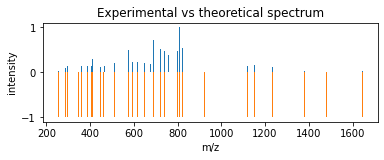

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    #plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = experiment_spectrum.get_peaks()

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)



alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
    # align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
print("Number of matched peaks: " + str(len(alignment)))
print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
print(50*"-")


for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(experiment_spectrum[obs_idx].getMZ()))
b=str(peptide_id.getMetaValue("scan_index"))
print(a)

theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(experiment_spectrum[obs_idx].getMZ())
    obs_int.append(experiment_spectrum[obs_idx].getIntensity())
plt.subplot(2, 1, 1)
    # make range form 300 to 1000 to see the simialrity
title = 'Experimental vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)  
   

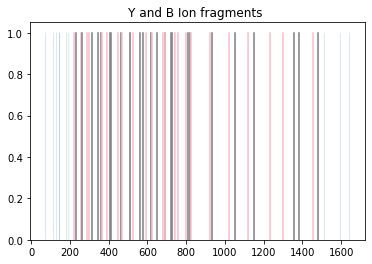

In [3]:
#y and b fragments
mz,i = spec1.get_peaks() 
plt.title("Y and B Ion fragments ")
count = 0
idx=0
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False)
for mz, i in zip(*theo_spectrum.get_peaks()):
    if mz >= 200 and mz <= 1500:
        if 'y' in theo_spectrum.getStringDataArrays()[0][count].decode():
          
            plt.plot([mz, mz], [0, i], snap=True, color="pink")

            count = count + 1
        else:
            plt.plot([mz, mz], [0, i], snap=True, color="gray")
                

            count = count + 1

plt.ylim(bottom=0)
plt.show()


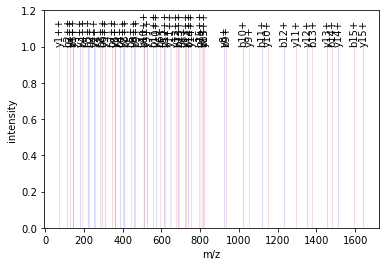

In [4]:
#can try another way
mz,i = spec1.get_peaks() 
annot = spec1.getStringDataArrays()[0] 
bars =plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False,color =("r","b"),)
count=0
for rect in bars: 
    height = rect.get_height() 
    if "y" in annot[count].decode():
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90, snap=True)
    else :
         plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90,snap=True) 
    idx += 1 
    count+=1
    plt.ylim(top=1.2) 
    plt.xlabel("m/z") 
    plt.ylabel("intensity")

In [1]:
#Proteolytic Digestion with Trypsin
from pyopenms import *
import matplotlib.pyplot as plt
import numpy as np
dig = ProteaseDigestion()
dig.getEnzymeName()
entries=[]
f=FASTAFile()
f.load("E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta",entries)
c=0
while c<len(entries)-1:
    f=AASequence.fromString(entries[c].sequence)
    print("sequence: ",c)
    result = []
    dig.digest(f, result)
    for e in result:
        print(e.toString())
    print(len(result)) 
    c=c+1
lis=[]
peptides=[AASequence.fromString(s.toString()) for s in result]
for peptide in peptides:
    tsg=TheoreticalSpectrumGenerator()
    spec1=MSSpectrum()
    p=Param()
    p.setValue("add_b_ions","true")
    p.setValue("add_y_ions","true")
    p.setValue("add_metainfo","true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1,peptide,1,1)
    lis.append(spec1)
    print("Spectrum 1 of",peptide,"has",lis[0].size(),"peaks")
  
  

sequence:  0
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEWLAVGGYGER
R
ERPAR
HGDR
VPHHR
HPER
R
GVR
AGGR
R
R
GHPR
AGPHDQQDEEHQR
RPDLQPLPAEPR
DGLR
LLPLR
HLPQR
LR
EPLPAR
HQQR
R
LHQHPHR
EVR
GR
R
R
AAR
ELQLPLR
GRPR
DR
R
LQGDGHR
LPR
GQR
DLHR
QDHPQQR
HR
GAPAPHGR
41
sequence:  1
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEMAR
CR
R
IWR
ATR
AACPPWR
SSAASPAP
10
sequence:  2
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSENGSLSEDMESDESGLPAMEIECR
ITGTLNGVEFELVGGGEGTPEQGR
MTNK
MK
STK
GALTFSPYLLSHVMGYGFYHFGTYPSGYENPFLHAINNGGYTNTR
IEK
YEDGGVLHVSFSYR
YEAGR
VIGDFK
VMGTGFPEDSVIFTDK
IIR
SNATVEHLHPMGDNDLDGSFTR
TFSLR
DGGYYSSVVDSHMHFK
SAIHPSILQNGGPMFAFR
R
VEEDHSNTELGIVEYQHAFK
TPDADAGEE
22
sequence:  3
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEGSLSEDMESDESGLPAMEIECR
ITGTLNGVEFELVGGGEGTPEQGR
MTNK
MK
STK
GALTFSPYL

In [4]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("E:\level 4\margo\MZml/AA8_082319_01.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("E:\level 4\margo\MZml/AA8_082319_01.mzML","E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())
  #Show all Data in peptides
    for hit in peptide_id.getHits():
        print(" - Peptide hit sequence:", hit.getSequence())
        mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
        print(" - Peptide hit monoisotopic m/z:", mz)
        score=mz/peptide_id.getMZ()
        print("comparsion score = ", score)
        a = str(hit.getSequence())
        tsg = TheoreticalSpectrumGenerator()
        spec1 = MSSpectrum()
        peptide = AASequence.fromString(a)
        p = Param()
        p.setValue("add_b_ion", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(spec1, peptide, 1, 2)
        tsg1 = TheoreticalSpectrumGenerator()
        theo_spectrum = MSSpectrum()
        p = tsg1.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg1.setParameters(p)
        peptide = AASequence.fromString(a)
        tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
        print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)
    # align both spectra
        spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
        print("Number of matched peaks: " + str(len(alignment)))
        print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
        print(50*"-")
        for theo_idx, obs_idx in alignment:
            ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(theo_spectrum[theo_idx].getMZ())
                  + "\t" + str(experiment_spectrum[obs_idx].getMZ()))


Peptide ID m/z: 969.0673828125
Peptide ID rt: 641.62009999998
Peptide scan index: 1160
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSEGSLSEDM(Oxidation)ESDESGLPAM(Oxidation)EIEC(Carbamidomethyl)R
 - Peptide hit monoisotopic m/z: 969.0600537880713
comparsion score =  0.9999924370332149
Spectrum 1 of AGSSEGSLSEDM(Oxidation)ESDESGLPAM(Oxidation)EIEC(Carbamidomethyl)R has 102 peaks.
Number of matched peaks: 18
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y6++	2	427.180765589971	427.1953572297823
b5+	1	432.17250726427096	432.2086134995136
b10++	2	453.195982359971	453.2202183306111
y7++	2	462.69932266972097	462.9268402212541
b11++	2	510.709454439721	510.7084580843917
y8++	2	511.22570478137095	510.99723138965135
y4+	1	577.2762604727709	577.1495419995894
b12++	2	584.227154448271	584.2687558512831
y10++	2	596.2784690046709	596.1760817128531
y11++	2	639.794483584421	640.2834785772623
b15++	2	749.7779382194211	749.77826767235

Number of matched peaks: 18
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y8++	2	404.70103681212106	404.70672268756766
b9++	2	422.213977391871	422.21308681497436
b5+	1	432.17250726427096	432.1854293229926
b10++	2	450.72470943972104	450.7245084056079
y9++	2	461.24306898757106	461.2429267006202
b11++	2	479.23544148757105	479.23461779182537
y4+	1	524.246340519471	524.2471339518079
y10++	2	525.2723581151711	525.2718102951711
b6+	1	560.231085519471	560.2390345681326
b12++	2	560.7671061311211	560.7666372038218
y5+	1	581.267804615171	581.3272571458356
b13++	2	589.277838178971	589.2791340603566
y11++	2	589.7936552268211	589.7927467926506
y6+	1	638.289268710871	638.3275609220457
b14++	2	653.799135290621	654.2177321737051
b7+	1	673.315149870371	673.3167456757678
y13++	2	676.8256843863212	676.3921896143218
y7+	1	737.3576829979711	737.7676487769329
Peptide ID m/z: 805.361267089844
Peptide ID rt: 1418.2608
Peptide scan index: 4017
Peptide ID sco

Number of matched peaks: 32
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b3+	1	216.09788388147098	216.09703063964844
y4++	2	262.626808493121	262.16766357421875
b6++	2	290.12409900907096	290.0162353515625
y2+	1	304.161547136671	304.2208251953125
y6++	2	319.64827258882104	319.3307189941406
b7++	2	346.66613118452096	346.3193359375
y3+	1	361.18301123237103	361.3059387207031
y7++	2	369.18247973237106	369.2904968261719
b8++	2	382.18468826427096	382.31268310546875
y8++	2	404.70103681212106	404.26226806640625
b5+	1	432.17250726427096	432.2739562988281
b10++	2	460.229627455671	460.38067626953125
y9++	2	461.24306898757106	461.2652587890625
b11++	2	488.740359503521	488.4405517578125
y4+	1	524.246340519471	524.2930297851562
y10++	2	534.7772761311211	534.4476318359375
b12++	2	570.2720241470711	570.2872314453125
b6+	1	579.240921551371	579.2835693359375
y5+	1	581.267804615171	581.331787109375
b13++	2	598.782756194921	598.4125366210938
y6+	1	638.2

y4+	1	472.251425519471	472.2522832062957
b4+	1	482.272160583271	482.27294281066713
b9++	2	494.782361131121	494.7832007164485
y9++	2	510.79546869492094	510.90078521708324
b10++	2	559.303658242771	559.3053133892646
y10++	2	568.308940774671	568.3188851911707
y5+	1	569.304189742771	569.3048445954245
b11++	2	607.830040354421	608.2488960941612
b5+	1	610.330738838471	609.9648136194837
y11++	2	616.835322886321	617.2743415581299
y6+	1	682.388254093671	682.3879680290358
b6+	1	707.383503061771	707.3726835677693
y7+	1	779.4410183169709	779.4366918807076
b7+	1	820.467567412671	820.8684494442081
y8+	1	907.499596572171	907.4824929119451
b10+	1	1117.6000400187709	1117.558500918179
Peptide ID m/z: 740.861145019531
Peptide ID rt: 2990.10829999998
Peptide scan index: 11396
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSEQLAVGGYGER
 - Peptide hit monoisotopic m/z: 740.854973513921
comparsion score =  0.9999916698214618
Spectrum 1 of AGSSEQLAVGGYGER has 54 peaks.
Number of matched peaks: 33

Number of matched peaks: 25
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y3+	1	361.18301123237103	361.1385803222656
y7++	2	369.18247973237106	369.2885437011719
b9++	2	414.726720439721	414.40850830078125
b5+	1	432.17250726427096	432.34637451171875
b10++	2	443.23745248757103	442.8699951171875
y9++	2	461.24306898757106	461.2436828613281
b11++	2	471.74818453542105	472.2286376953125
y10++	2	517.7851011630211	517.349609375
y4+	1	524.246340519471	524.2442626953125
b12++	2	553.2798491789711	553.4429931640625
y5+	1	581.267804615171	581.2806396484375
y11++	2	582.3063982746711	582.2715454101562
y6+	1	638.289268710871	638.3545532226562
b14++	2	646.311878338471	646.55224609375
b7+	1	658.340635966071	658.431640625
y13++	2	669.3384274341712	669.3585205078125
y14++	2	697.8491594820212	697.6410522460938
b8+	1	729.377750125571	729.4695434570312
y7+	1	737.3576829979711	737.5540161132812
y8+	1	808.3947971574711	808.6004638671875
b10+	1	885.46762850837

b10++	2	531.290550678971	531.3291625976562
y4+	1	540.292895647071	540.196533203125
b11++	2	559.801282726821	559.3786010742188
y10++	2	570.766385496121	570.3737182617188
b12++	2	588.312014774671	588.6658325195312
b6+	1	593.304189742771	593.2852172851562
y11++	2	627.308417671571	626.891357421875
b13++	2	636.838396886321	636.3545532226562
y12++	2	683.850449847021	683.5040893554688
y5+	1	687.328295664171	687.3713989257812
b7+	1	706.388254093671	706.4866333007812
y13++	2	727.366464426771	727.31591796875
y14++	2	775.892846538421	776.3196411132812
b15++	2	783.890304038421	784.0611572265625
b16++	2	819.408861118171	819.4320678710938
y7+	1	841.402523983171	841.620849609375
b17++	2	892.943068261721	892.7416381835938
y8+	1	898.423988078871	898.295654296875
y16++	2	900.9643348255211	901.4301147460938
y9+	1	1012.4669162702711	1012.55615234375
b10+	1	1061.573824891171	1061.566162109375
b11+	1	1118.5952889868709	1118.4984130859375
y10+	1	1140.5254945254712	1140.724853515625
b12+	1	1175.6167530825708	